In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ian/diabetes.csv')


In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# check missing values in variables

data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
X = data.drop(['Outcome'], axis=1)  # drop outcome column and include all other column
y = data['Outcome'] #  only outcome is included #iloc ,x(outcone,age)

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [13]:
# instantiate the DecisionTreeClassifier model with criterion gini index

dtc = DecisionTreeClassifier(criterion='gini', random_state=0)


In [14]:
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
y_pred = dtc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7087


In [17]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix of dtc\n\n', cm)

Confusion matrix of dtc

 [[127  41]
 [ 33  53]]


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.56      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.71      0.71       254



AUC: 0.69


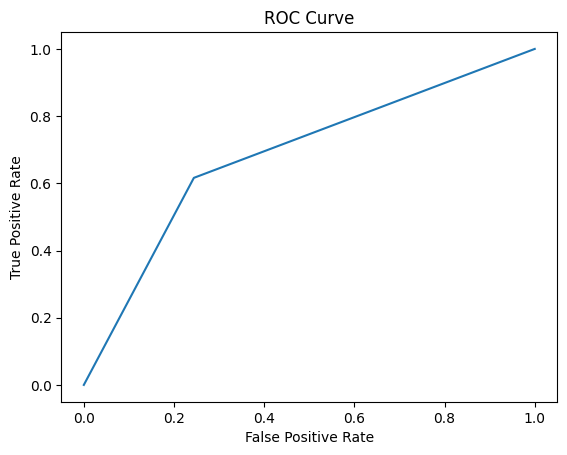

In [19]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of rfc: 0.7480


In [23]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix of dtc\n\n', cm)

Confusion matrix of dtc

 [[136  32]
 [ 32  54]]


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       168
           1       0.63      0.63      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



AUC: 0.72


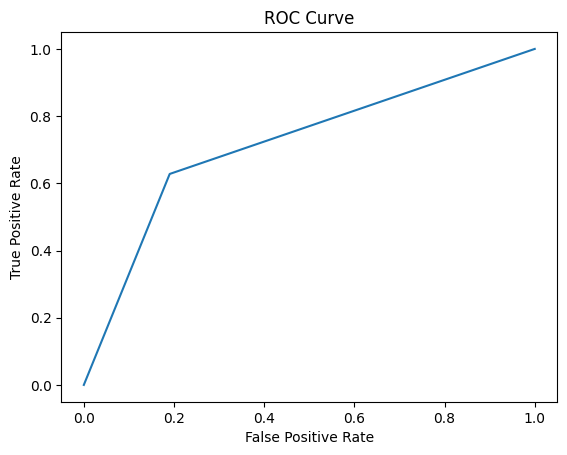

In [25]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SVM

In [26]:
import numpy as np
import pandas as pd

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data=pd.read_csv('/content/drive/MyDrive/ian/diabetes.csv')

In [29]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
X = data.drop(['Outcome'], axis=1)  # drop outcome column and include all other column
y = data['Outcome'] #  only outcome is included #iloc ,x(outcone,age)

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred=svm.predict(X_test)

In [35]:
svm=SVC(kernel="linear")

In [36]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7520


LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR=LogisticRegression()

In [39]:
LR.fit(X_train,y_train)

LogisticRegression()

In [40]:
LR.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [41]:
y_pred=LR.predict(X_test)

In [42]:
LR=SVC(kernel="linear")

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7402


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
GBC=GradientBoostingClassifier()

In [46]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [47]:
GBC.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [48]:
y_pred=GBC.predict(X_test)

In [49]:
GBC=SVC(kernel="linear")

In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7362


In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
abc=AdaBoostClassifier()

In [53]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [54]:
abc.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [55]:
y_pred=abc.predict(X_test)

In [56]:
abc=SVC(kernel="linear")

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of dtc: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of dtc: 0.7520


LINEAR REGRESSION

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
LR=LinearRegression()

In [60]:
LR.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred=LR.predict(X_test)

In [62]:
LR=SVC(kernel="linear")

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
KN=KNeighborsClassifier(n_neighbors=8)

In [65]:
KN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [66]:
KN.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [67]:
y_pred=KN.predict(X_test)

In [68]:
KN.predict(X_test,)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [69]:
y_pred=KN.predict(X_test)

In [70]:
KN=SVC(kernel="linear")

In [71]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of lr: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of lr: 0.7047


NAIVE BAYES

In [88]:
from sklearn.naive_bayes import GaussianNB

In [92]:
NB=GaussianNB()

In [75]:
NB.fit(X_train,y_train)

GaussianNB()

In [78]:
y_pred=NB.predict(X_test)

In [79]:
y_pred=NB.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of lr: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score of lr: 0.7362
